In [ ]:
## 12345

In [137]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
from IPython.display import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.datasets import load_diabetes, load_iris, make_blobs, fetch_openml
from sklearn.model_selection import train_test_split, validation_curve, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

from sklearn import metrics, svm, metrics, datasets
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### ÏÑ†Ìòï ÌöåÍ∑Ä: ÎãπÎá®Î≥ë ÏòàÏ†ú

In [78]:
# Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [79]:
X = diabetes.data

In [80]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [81]:
# Îç∞Ïù¥ÌÑ∞ÏÖã ÌòàÎãπ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
# ÌòàÎãπ Îç∞Ïù¥ÌÑ∞Îäî 2Î≤àÏß∏ Ïó¥Ïóê ÏúÑÏπò
# 2Î≤àÏß∏ Ïó¥ÏùÄ 0Î∂ÄÌÑ∞ ÏãúÏûëÌïòÎØÄÎ°ú 2Î≤àÏß∏ Ïó¥ÏùÄ Ïù∏Îç±Ïä§ 3Ïóê Ìï¥Îãπ
# reshape Ìï®ÏàòÎäî 1Ï∞®Ïõê Î∞∞Ïó¥ÏùÑ 2Ï∞®Ïõê Î∞∞Ïó¥Î°ú Î≥ÄÌôò
X = diabetes.data[:, 2].reshape(-1, 1)  
y = diabetes.target  # Sugar level

In [82]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [83]:
y = diabetes.target.reshape(-1, 1)  # reshape Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ 1Ï∞®Ïõê Î∞∞Ïó¥ÏùÑ 2Ï∞®Ïõê Î∞∞Ïó¥Î°ú Î≥ÄÌôò

In [84]:
# ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
model = LinearRegression()
model.fit(X, y)

LinearRegression()

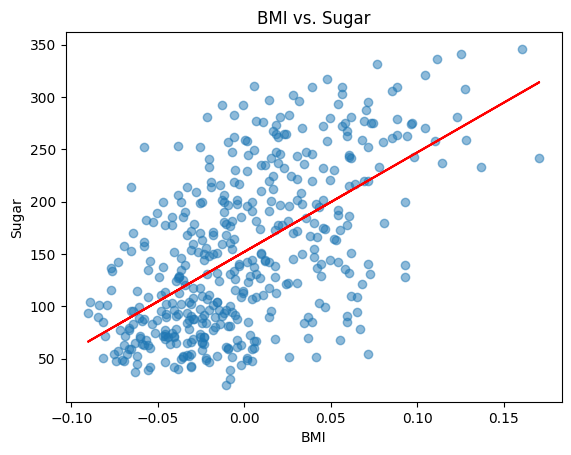

In [85]:
# ÌöåÍ∑ÄÏÑ† Í∑∏Î¶¨Í∏∞
y_pred = model.predict(X) # ÏòàÏ∏°Í∞í
plt.scatter(X,y, alpha=0.5)
plt.plot(X,y_pred, color='red')
plt.title('BMI vs. Sugar')
plt.xlabel('BMI')
plt.ylabel('Sugar')
plt.show()

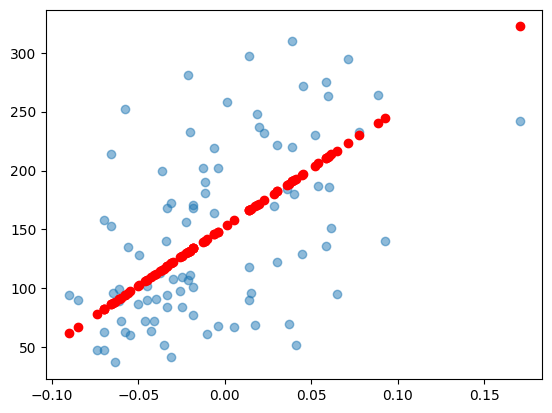

In [ ]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Î™®Îç∏ÏùÑ ÌõàÎ†® ÏÑ∏Ìä∏Î°ú ÌïôÏäµ
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïóê ÎåÄÌïú ÏòàÏ∏°Í∞í

plt.scatter(X_test, y_test, alpha=0.5, label='Actual') # Ïã§Ï†ú Í∞í
plt.scatter(X_test, y_pred, color='red', label='Predicted') # ÏòàÏ∏° Í∞í
plt.show()

### K-NN: Iris 

In [ ]:
# Iris Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
iris = load_iris()

In [ ]:
# ÏûÖÎ†•Í≥º Ï∂úÎ†•ÏùÑ ÏÑ§Ï†ïÌïúÎã§. 
X = iris.data
y = iris.target

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÎπÑÏú® (80:20)ÏúºÎ°ú Î∂ÑÌï†ÌïúÎã§. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(120, 4)


In [ ]:
# ÌïôÏäµ Îã®Í≥Ñ
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# ÌÖåÏä§Ìä∏ Îã®Í≥Ñ
y_pred = knn.predict(X_test)

# Ï†ïÌôïÎèÑ Ï†êÏàò Ï∂úÎ†•
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

1.0


In [91]:
# ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ Ï†úÏãú
#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

# ÏïÑÏßÅ Î≥¥ÏßÄ Î™ªÌïú ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Î•º Ï†úÏãúÌï¥Î≥¥Ïûê. 
x_new = [[3,4,5,2],
         [5,4,2,2]] # 2Í∞úÏùò ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


### SVM, SVC: Iris

In [ ]:
svc = svm.SVC(gamma=0.1, C=5) 

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

# Ï†ïÌôïÎèÑ Ï†êÏàò Ï∂úÎ†•
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

1.0


In [93]:
# ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ Ï†úÏãú
x_new = [[3,4,5,2],
         [5,4,2,2]] # 2Í∞úÏùò ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞
y_predict = svc.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

virginica
setosa


### Decision Tree: Iris

In [ ]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ: 1.0
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ: 0.9666666666666667


[Text(0.4, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'x[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 

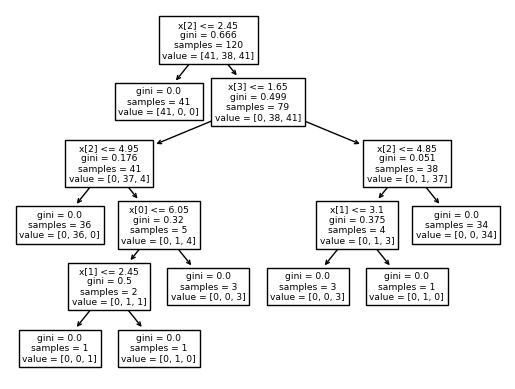

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.20)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_train)
print("ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ:", accuracy_score(y_true = y_train, y_pred = y_pred))

y_pred = clf.predict(X_test)
print("ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ:", accuracy_score(y_true = y_test, y_pred=y_pred))

from sklearn.tree import plot_tree
plot_tree(clf)

### K-Means Clustering

[[16.66666667 15.83333333]
 [72.16666667 75.66666667]]
[0 0 0 0 0 0 1 1 1 1 1 1]


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


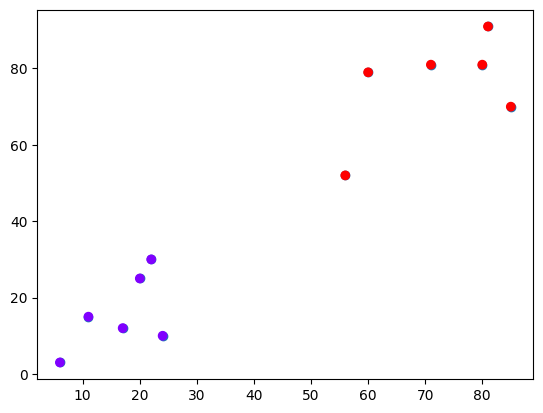

In [ ]:
# XÎäî 2Ï∞®Ïõê Î∞∞Ïó¥Î°ú, Í∞Å ÌñâÏùÄ Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Î•º ÎÇòÌÉÄÎÉÑ
X = np.array([
     [6,3], [11,15], [17,12], [24,10], [20,25], [22,30],
     [85,70], [71,81], [60,79], [56,52], [81,91], [80,81]])

# X[:,0]: XÏùò Î™®Îì† ÌñâÏóêÏÑú Ï≤´ Î≤àÏß∏ Ïó¥, X[:,1]: XÏùò Î™®Îì† ÌñâÏóêÏÑú Îëê Î≤àÏß∏ Ïó¥
plt.scatter(X[:,0],X[:,1])

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Ï§ëÏã¨ Ï¢åÌëú
print(kmeans.cluster_centers_)

# Í∞Å Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Í∞Ä ÏÜçÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ Î†àÏù¥Î∏î
print(kmeans.labels_)

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()

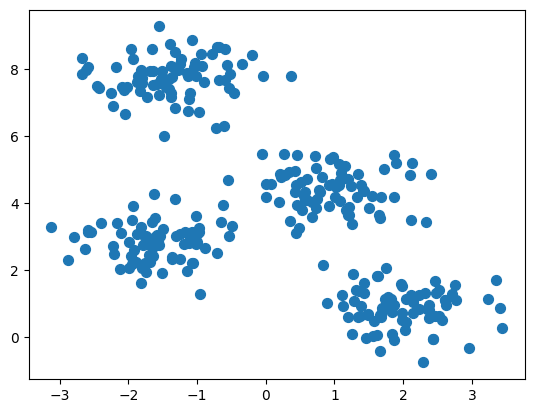

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50)


[0 1 3 1 0 0 2 3 1 1 2 1 3 1 0 3 3 0 2 2 0 0 3 2 2 3 0 3 2 3 1 1 3 1 1 1 1
 1 2 0 3 2 3 3 2 2 1 2 1 0 2 0 1 0 0 2 1 2 1 0 1 3 1 2 2 2 1 0 1 2 3 2 1 2
 2 1 2 3 0 1 0 3 0 0 1 3 0 3 1 1 3 0 1 2 2 3 0 0 3 2 1 0 1 0 3 0 0 3 1 3 2
 2 0 1 0 3 1 0 0 3 2 0 2 0 0 0 0 2 0 2 1 2 2 0 1 2 2 1 3 1 1 2 3 2 3 2 1 3
 1 1 1 3 1 3 0 2 1 2 0 3 1 3 3 0 3 2 2 3 0 3 3 1 0 3 2 1 0 0 3 2 0 3 2 2 3
 3 3 3 0 1 3 2 3 3 2 2 2 3 2 1 3 2 0 2 3 1 2 1 3 1 3 2 3 3 1 2 2 0 0 3 1 0
 0 2 0 2 3 1 1 3 3 1 3 0 2 3 0 2 1 2 0 3 0 1 1 1 1 2 2 1 3 2 0 3 2 2 2 0 0
 1 3 3 2 0 1 2 3 1 3 0 0 2 2 3 0 0 0 3 1 1 0 0 3 0 0 0 1 2 1 3 0 0 1 1 1 0
 0 3 1 2]


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


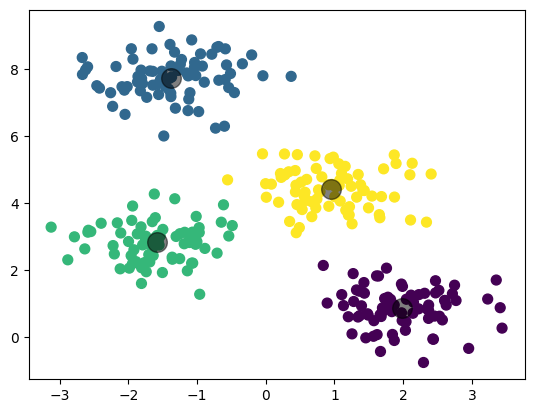

In [98]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï§ëÏã¨ÏùÑ ÌëúÏãú
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

### PCA Î∂ÑÏÑù

In [ ]:
# Î∂ìÍΩÉ Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥ ÌåêÎã§Ïä§ Îç∞Ïù¥ÌÑ∞Î°ú Íµ¨ÏÑ±
iris = load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  

In [ ]:
# ÌëúÏ§ÄÌôî Ï†ÑÏ≤òÎ¶¨
features = iris['feature_names']
print(features)
# : Î™®Îì† ÌñâÏùÑ ÏÑ†ÌÉù, featuresÎäî ÏßÄÏ†ïÌïú Ïó¥ Ïù¥Î¶ÑÎì§, .valuesÎäî ÏÑ†ÌÉùÌïú Îç∞Ïù¥ÌÑ∞Î•º NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
# dfÏóêÏÑú featuresÏóê Ìï¥ÎãπÌïòÎäî Ïó¥ÏùÑ ÎΩëÏïÑ numpy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
X = StandardScaler().fit_transform(X)

print(X)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e

In [ ]:
# ÌëúÏ§ÄÌôîÎêú Î∂ìÍΩÉ Îç∞Ïù¥ÌÑ∞Ïóê PCAÎ•º Ï†ÅÏö©
pca = PCA(n_components=2)
pca_result  = pca.fit_transform(X)
principalDf = pd.DataFrame(data = pca_result, columns = ['PC1', 'PC2'])
principalDf, df['target']

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
print(finalDf)

          PC1       PC2  target
0   -2.264703  0.480027     0.0
1   -2.080961 -0.674134     0.0
2   -2.364229 -0.341908     0.0
3   -2.299384 -0.597395     0.0
4   -2.389842  0.646835     0.0
..        ...       ...     ...
145  1.870503  0.386966     2.0
146  1.564580 -0.896687     2.0
147  1.521170  0.269069     2.0
148  1.372788  1.011254     2.0
149  0.960656 -0.024332     2.0

[150 rows x 3 columns]


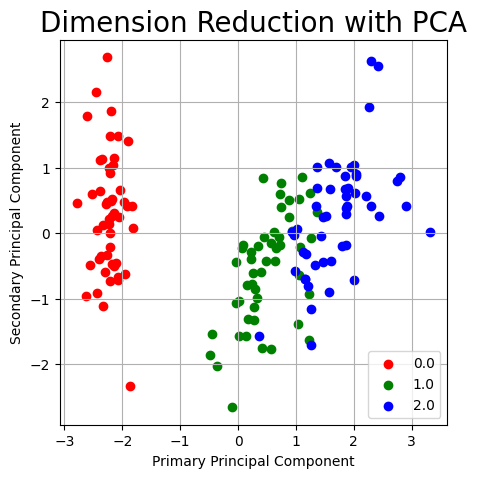

In [102]:
# 2Ï∞®Ïõê Í≥µÍ∞ÑÏúºÎ°ú Ï∂ïÏÜåÎêú Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏãúÌôî

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Primary Principal Component')
ax.set_ylabel('Secondary Principal Component')
ax.set_title('Dimension Reduction with PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    idx = finalDf['target'] == target
    ax.scatter(finalDf.loc[idx, 'PC1'] , finalDf.loc[idx, 'PC2']
               , c = color)
ax.legend(targets)
ax.grid()

### ÌçºÏÖâÌä∏Î°† ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç

In [119]:
# ÌõàÎ†® ÏßëÌï© Íµ¨Ï∂ï
X=[[0,0],[0,1],[1,0],[1,1]]
y=[-1,1,1,1]

# fit Ìï®ÏàòÎ°ú Perceptron ÌïôÏäµ
p=Perceptron()
p.fit(X,y)

print("ÌïôÏäµÎêú ÌçºÏÖâÌä∏Î°†Ïùò Îß§Í∞úÎ≥ÄÏàò: ",p.coef_,p.intercept_) # p.coef_Îäî Í∞ÄÏ§ëÏπò, p.intercept_Îäî Ï†àÌé∏
print("ÌõàÎ†®ÏßëÌï©Ïóê ÎåÄÌïú ÏòàÏ∏°: ",p.predict(X))
print("Ï†ïÌôïÎ•† Ï∏°Ï†ï: ",p.score(X,y)*100,"%")

ÌïôÏäµÎêú ÌçºÏÖâÌä∏Î°†Ïùò Îß§Í∞úÎ≥ÄÏàò:  [[2. 2.]] [-1.]
ÌõàÎ†®ÏßëÌï©Ïóê ÎåÄÌïú ÏòàÏ∏°:  [-1  1  1  1]
Ï†ïÌôïÎ•† Ï∏°Ï†ï:  100.0 %


In [120]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏùΩÍ≥† ÌõàÎ†® ÏßëÌï©Í≥º ÌÖåÏä§Ìä∏ ÏßëÌï©ÏúºÎ°ú Î∂ÑÌï†
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

In [105]:
# x_train, x_testÏùÄ 64Ï∞®Ïõê Î≤°ÌÑ∞, y_train, y_testÎäî 0~9 ÏÇ¨Ïù¥Ïùò Ïà´Ïûê Î†àÏù¥Î∏î 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1078, 64), (719, 64), (1078,), (719,))

In [106]:
# fit Ìï®ÏàòÎ°ú Perceptron ÌïôÏäµ
p=Perceptron(max_iter=100,eta0=0.001,verbose=0)
p.fit(x_train,y_train) # digit Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÎßÅ

res=p.predict(x_test) # ÌÖåÏä§Ìä∏ ÏßëÌï©ÏúºÎ°ú ÏòàÏ∏°

# ÌòºÎèô ÌñâÎ†¨
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# Ï†ïÌôïÎ•† Í≥ÑÏÇ∞
no_correct=0
for i in range(10):
    no_correct+=conf[i][i] # ÏòàÏ∏°Ïù¥ ÎßûÏùÄ Í≤ΩÏö∞Ïùò ÏàòÎ•º Ìï©ÏÇ∞
accuracy=no_correct/len(res) # Ï†ïÌôïÎ•† Í≥ÑÏÇ∞
print("ÌÖåÏä§Ìä∏ ÏßëÌï©Ïóê ÎåÄÌïú Ï†ïÌôïÎ•†ÏùÄ ", accuracy*100, "%ÏûÖÎãàÎã§.")

[[73.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0. 65.  1.  0.  2.  2.  0.  0. 12.  3.]
 [ 0.  0. 73.  1.  0.  0.  0.  0.  3.  0.]
 [ 0.  1.  2. 71.  0.  0.  0.  1.  4.  1.]
 [ 0.  0.  0.  0. 62.  0.  0.  2.  0.  0.]
 [ 1.  1.  0.  2.  0. 74.  1.  0.  2.  1.]
 [ 0.  0.  0.  0.  0.  1. 69.  0.  3.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. 63.  3.  4.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 46.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  4. 61.]]
ÌÖåÏä§Ìä∏ ÏßëÌï©Ïóê ÎåÄÌïú Ï†ïÌôïÎ•†ÏùÄ  91.3769123783032 %ÏûÖÎãàÎã§.


Îã§Ï∏µ ÌçºÏÖâÌä∏Î°†: digit

In [108]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏùΩÍ≥† ÌõàÎ†® ÏßëÌï©Í≥º ÌÖåÏä§Ìä∏ ÏßëÌï©ÏúºÎ°ú Î∂ÑÌï†
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1078, 64), (719, 64), (1078,), (719,))

In [109]:
# MLP Î∂ÑÎ•òÍ∏∞ Î™®Îç∏ÏùÑ ÌïôÏäµ
mlp=MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd',verbose=True)
mlp.fit(x_train,y_train)

res=mlp.predict(x_test) # ÌÖåÏä§Ìä∏ ÏßëÌï©ÏúºÎ°ú ÏòàÏ∏°

# ÌòºÎèô ÌñâÎ†¨
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# Ï†ïÌôïÎ•† Í≥ÑÏÇ∞
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("ÌÖåÏä§Ìä∏ ÏßëÌï©Ïóê ÎåÄÌïú Ï†ïÌôïÎ•†ÏùÄ ", accuracy*100, "%ÏûÖÎãàÎã§.")

Iteration 1, loss = 2.52792610
Iteration 2, loss = 0.38023657
Iteration 3, loss = 0.25868264
Iteration 4, loss = 0.20568326
Iteration 5, loss = 0.17472332
Iteration 6, loss = 0.14738803
Iteration 7, loss = 0.13203174
Iteration 8, loss = 0.11364978
Iteration 9, loss = 0.10083835
Iteration 10, loss = 0.09518829
Iteration 11, loss = 0.08776207
Iteration 12, loss = 0.07537353
Iteration 13, loss = 0.06983062
Iteration 14, loss = 0.06454186
Iteration 15, loss = 0.06071830
Iteration 16, loss = 0.05410670
Iteration 17, loss = 0.05225592
Iteration 18, loss = 0.05041402
Iteration 19, loss = 0.04727987
Iteration 20, loss = 0.04225860
Iteration 21, loss = 0.04078671
Iteration 22, loss = 0.04066633
Iteration 23, loss = 0.03592494
Iteration 24, loss = 0.03407405
Iteration 25, loss = 0.03256910
Iteration 26, loss = 0.03222497
Iteration 27, loss = 0.02912442
Iteration 28, loss = 0.02893885
Iteration 29, loss = 0.02714101
Iteration 30, loss = 0.02633689
Iteration 31, loss = 0.02485683
Iteration 32, los

In [110]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏùΩÍ≥† ÌõàÎ†® ÏßëÌï©Í≥º ÌÖåÏä§Ìä∏ ÏßëÌï©ÏúºÎ°ú Î∂ÑÌï†
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# MLP Î∂ÑÎ•òÍ∏∞ Î™®Îç∏ÏùÑ ÌïôÏäµ
mlp=MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd',verbose=True)
mlp.fit(x_train,y_train)

res=mlp.predict(x_test) # ÌÖåÏä§Ìä∏ ÏßëÌï©ÏúºÎ°ú ÏòàÏ∏°

# ÌòºÎèô ÌñâÎ†¨
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# Ï†ïÌôïÎ•† Í≥ÑÏÇ∞
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("ÌÖåÏä§Ìä∏ ÏßëÌï©Ïóê ÎåÄÌïú Ï†ïÌôïÎ•†ÏùÄ ", accuracy*100, "%ÏûÖÎãàÎã§.")

Iteration 1, loss = 2.05608219
Iteration 2, loss = 0.30493664
Iteration 3, loss = 0.19266092
Iteration 4, loss = 0.15689207
Iteration 5, loss = 0.12370875
Iteration 6, loss = 0.10237320
Iteration 7, loss = 0.09025085
Iteration 8, loss = 0.07786994
Iteration 9, loss = 0.06886133
Iteration 10, loss = 0.06302822
Iteration 11, loss = 0.05769489
Iteration 12, loss = 0.04992626
Iteration 13, loss = 0.04616667
Iteration 14, loss = 0.04460734
Iteration 15, loss = 0.04081699
Iteration 16, loss = 0.03721684
Iteration 17, loss = 0.03504087
Iteration 18, loss = 0.03290108
Iteration 19, loss = 0.03117781
Iteration 20, loss = 0.02942909
Iteration 21, loss = 0.02743246
Iteration 22, loss = 0.02568907
Iteration 23, loss = 0.02476984
Iteration 24, loss = 0.02343348
Iteration 25, loss = 0.02342387
Iteration 26, loss = 0.02185662
Iteration 27, loss = 0.02165722
Iteration 28, loss = 0.02023891
Iteration 29, loss = 0.01910442
Iteration 30, loss = 0.01875985
Iteration 31, loss = 0.01800428
Iteration 32, los

### ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Îß§Í∞úÎ≥ÄÏàò ÏµúÏ†ÅÌôî: validation curve Ìï®Ïàò Ïù¥Ïö©

In [ ]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏùΩÍ≥† ÌõàÎ†® ÏßëÌï©Í≥º ÌÖåÏä§Ìä∏ ÏßëÌï©ÏúºÎ°ú Î∂ÑÌï†
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# Îã§Ï∏µ ÌçºÏÖâÌä∏Î°†ÏùÑ ÍµêÏ∞® Í≤ÄÏ¶ùÏúºÎ°ú ÏÑ±Îä• ÌèâÍ∞Ä (ÏÜåÏöî ÏãúÍ∞Ñ Ï∏°Ï†ï Ìè¨Ìï®)
start=time.time() # ÏãúÏûë ÏãúÍ∞Å
mlp=MLPClassifier(learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
prange=range(50,1001,50)
# Ï°∞Ï†ïÌï† ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞: hidden_layer_sizes ÏùÄÎãâÏ∏µ ÎÖ∏Îìú Í∞úÏàò
train_score,test_score=validation_curve(mlp,x_train,y_train,param_name="hidden_layer_sizes",param_range=prange,cv=10,scoring="accuracy",n_jobs=4)
end=time.time() # ÎÅùÎÇú ÏãúÍ∞Å
print("ÌïòÏù¥Ìçº Îß§Í∞úÎ≥ÄÏàò ÏµúÏ†ÅÌôîÏóê Í±∏Î¶∞ ÏãúÍ∞ÑÏùÄ",end-start,"Ï¥àÏûÖÎãàÎã§.")

ÌïòÏù¥Ìçº Îß§Í∞úÎ≥ÄÏàò ÏµúÏ†ÅÌôîÏóê Í±∏Î¶∞ ÏãúÍ∞ÑÏùÄ 184.5517246723175 Ï¥àÏûÖÎãàÎã§.


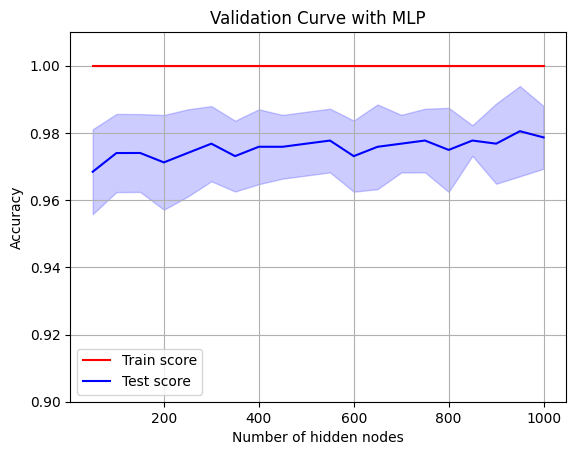


ÏµúÏ†ÅÏùò ÏùÄÎãâÏ∏µÏùò ÎÖ∏Îìú Í∞úÏàòÎäî 950 Í∞úÏûÖÎãàÎã§.



In [112]:
# ÍµêÏ∞® Í≤ÄÏ¶ù Í≤∞Í≥ºÏùò ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ Íµ¨ÌïòÍ∏∞
train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)
test_mean = np.mean(test_score,axis=1)
test_std = np.std(test_score,axis=1)

# ÏÑ±Îä• Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.plot(prange,train_mean,label="Train score",color="r")
plt.plot(prange,test_mean,label="Test score",color="b")
plt.fill_between(prange,train_mean-train_std,train_mean+train_std,alpha=0.2,color="r")
plt.fill_between(prange,test_mean-test_std,test_mean+test_std,alpha=0.2,color="b")
plt.legend(loc="best")
plt.title("Validation Curve with MLP")
plt.xlabel("Number of hidden nodes"); plt.ylabel("Accuracy")
plt.ylim(0.9,1.01)
plt.grid(axis='both')
plt.show()

best_number_nodes=prange[np.argmax(test_mean)] # ÏµúÏ†ÅÏùò ÏùÄÎãâ ÎÖ∏Îìú Í∞úÏàò
print("\nÏµúÏ†ÅÏùò ÏùÄÎãâÏ∏µÏùò ÎÖ∏Îìú Í∞úÏàòÎäî",best_number_nodes,"Í∞úÏûÖÎãàÎã§.\n")

In [113]:
# ÏµúÏ†ÅÏùò ÏùÄÎãâ ÎÖ∏Îìú Í∞úÏàòÎ°ú Î™®Îç∏ÎßÅ
mlp_test=MLPClassifier(hidden_layer_sizes=(best_number_nodes),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
mlp_test.fit(x_train,y_train)

# ÌÖåÏä§Ìä∏ ÏßëÌï©ÏúºÎ°ú ÏòàÏ∏°
res=mlp_test.predict(x_test)

# ÌòºÎèô ÌñâÎ†¨
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# Ï†ïÌôïÎ•† Í≥ÑÏÇ∞
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("ÌÖåÏä§Ìä∏ ÏßëÌï©Ïóê ÎåÄÌïú Ï†ïÌôïÎ•†ÏùÄ", accuracy*100, "%ÏûÖÎãàÎã§.")

[[73.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 77.  0.  0.  0.  0.  0.  0.  3.  1.]
 [ 0.  0. 66.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 69.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 76.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. 68.  1.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1. 75.  0.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.  0. 66.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0. 65.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0. 72.]]
ÌÖåÏä§Ìä∏ ÏßëÌï©Ïóê ÎåÄÌïú Ï†ïÌôïÎ•†ÏùÄ 98.33101529902642 %ÏûÖÎãàÎã§.


![](D:/ÍπÄÎèôÏòÅ/11_Github/mygit-1/mygit-2/Ïù∏Í≥µÏßÄÎä•ÏàòÏóÖ/2025-06-14-17-30-35.png)

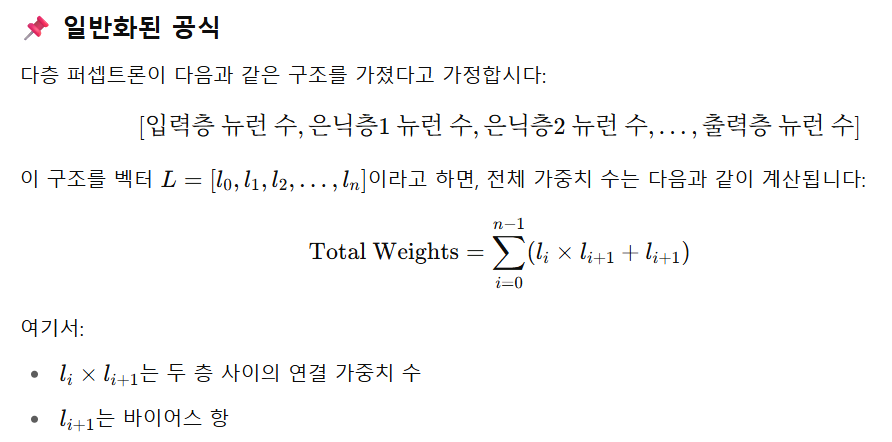

In [ ]:
Image('D:/ÍπÄÎèôÏòÅ/Mygit/Mygit/Mygit/Ïù∏Í≥µÏßÄÎä•ÏàòÏóÖ/Ïù¥ÎØ∏ÏßÄ/Ïä§ÌÅ¨Î¶∞ÏÉ∑ 2025-06-14 172800.png')

ÌÖêÏÑúÌîåÎ°úÎ•º ÌôúÏö©Ìïú MLP

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
469/469 - 9s - 19ms/step - accuracy: 0.8963 - loss: 0.0264 - val_accuracy: 0.9468 - val_loss: 0.0129
Epoch 2/30
469/469 - 8s - 16ms/step - accuracy: 0.9534 - loss: 0.0106 - val_accuracy: 0.9576 - val_loss: 0.0085
Epoch 3/30
469/469 - 8s - 17ms/step - accuracy: 0.9657 - loss: 0.0070 - val_accuracy: 0.9650 - val_loss: 0.0067
Epoch 4/30
469/469 - 7s - 15ms/step - accuracy: 0.9749 - loss: 0.0053 - val_accuracy: 0.9695 - val_loss: 0.0058
Epoch 5/30
469/469 - 7s - 15ms/step - accuracy: 0.9797 - loss: 0.0044 - val_accuracy: 0.9722 - val_loss: 0.0055
Epoch 6/30
469/469 - 7s - 15ms/step - accuracy: 0.9826 - loss: 0.0038 - val_accuracy: 0.9749 - val_loss: 0.0047
Epoch 7/30
469/469 - 7s - 15ms/step - accuracy: 0.9846 - loss: 0.0033 - val_accuracy: 0.9739 - val_loss: 0.0050
Epoch 8/30
469/469 - 7s - 16ms/step - accuracy: 0.9857 - loss: 0.0031 - val_accuracy: 0.9753 - val_loss: 0.0045
Epoch 9/30
469/469 - 7s - 15ms/step - accuracy: 0.9884 - loss: 0.0026 - val_accuracy: 0.9766 - val_loss:

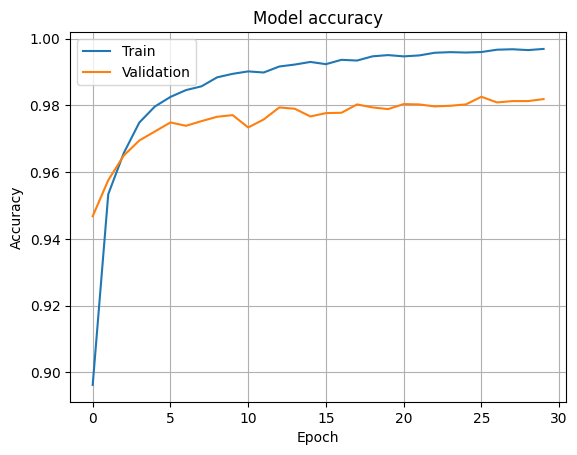

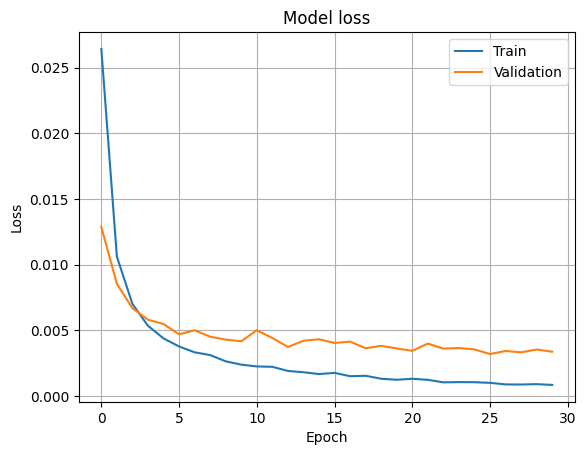

In [125]:
# MNIST ÏùΩÏñ¥ ÏôÄÏÑú Ïã†Í≤ΩÎßùÏóê ÏûÖÎ†•Ìï† ÌòïÌÉúÎ°ú Î≥ÄÌôò
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # ÌÖêÏÑú Î™®Ïñë Î≥ÄÌôò
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarrayÎ°ú Î≥ÄÌôò
x_test=x_test.astype(np.float32)/255.0

y_train=tf.keras.utils.to_categorical(y_train,10) # ÌÉÄÍ≤ü Î†àÏù¥Î∏îÏùÑ Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏúºÎ°ú Î≥ÄÌôò
y_test=tf.keras.utils.to_categorical(y_test,10) # ÌÉÄÍ≤ü Î†àÏù¥Î∏îÏùÑ Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏúºÎ°ú Î≥ÄÌôò

# Ïã†Í≤ΩÎßù Íµ¨Ï°∞ ÏÑ§Ï†ï
n_input=784 # Îç∞Ïù¥ÌÑ∞ ÌïòÎÇò Îãπ 784Ï∞®Ïõê Î≤°ÌÑ∞
n_hidden1=1024 # Ï≤´ Î≤àÏß∏ ÏùÄÎãâÏ∏µ ÎÖ∏Îìú Í∞úÏàò
n_hidden2=512 # Îëê Î≤àÏß∏ ÏùÄÎãâÏ∏µ ÎÖ∏Îìú Í∞úÏàò
n_hidden3=512 # ÏÑ∏ Î≤àÏß∏ ÏùÄÎãâÏ∏µ ÎÖ∏Îìú Í∞úÏàò
n_hidden4=512 # ÎÑ§ Î≤àÏß∏ ÏùÄÎãâÏ∏µ ÎÖ∏Îìú Í∞úÏàò
n_output=10 # Ï∂úÎ†•Ï∏µ ÎÖ∏Îìú Í∞úÏàò (0~9ÍπåÏßÄÏùò Ïà´ÏûêÏù¥ÎØÄÎ°ú 10Í∞ú)

# Ïã†Í≤ΩÎßù Íµ¨Ï°∞ ÏÑ§Í≥Ñ
mlp=Sequential()
# actication, kernel_initializer, bias_initializerÎäî Î™®Îëê Í∏∞Î≥∏Í∞íÏúºÎ°ú ÏÑ§Ï†ï
# kernel_initializerÎäî Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞ÌôîÌïòÏó¨ Í∏∞Ïö∏Í∏∞ ÏÜåÏã§Ïù¥ÎÇò Ìè≠Î∞ú Î¨∏Ï†úÎ•º Î∞©ÏßÄÌïúÎã§. 
# 4Í∞úÏùò ÏùÄÎãâÏ∏µÏúºÎ°ú Ïù¥Î£®Ïñ¥Ï°åÏúºÎ©∞, Í∞Å ÏùÄÎãâÏ∏µÏùÄ tanh ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïúÎã§.
mlp.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

# Ïã†Í≤ΩÎßù ÌïôÏäµ
# ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ°úÎäî AdamÏùÑ ÏÇ¨Ïö©ÌñàÏúºÎÇò Adagrad(), RMSprop(), SGD() Îì± Îã§Î•∏ Í≤ÉÎèÑ ÏÇ¨Ïö© Í∞ÄÎä•
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# Ïã†Í≤ΩÎßùÏùò Ï†ïÌôïÎ•† Ï∏°Ï†ï
res=mlp.evaluate(x_test,y_test,verbose=0)
print("Ï†ïÌôïÎ•†ÏùÄ",res[1]*100)

# Ï†ïÌôïÎ•† Í≥°ÏÑ†
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# ÏÜêÏã§ Ìï®Ïàò Í≥°ÏÑ†
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

### Ïó¨Îü¨ ÏÜêÏã§Ìï®Ïàò ÏÇ¨Ïö©

In [ ]:
# MNIST ÏùΩÏñ¥ ÏôÄÏÑú Ïã†Í≤ΩÎßùÏóê ÏûÖÎ†•Ìï† ÌòïÌÉúÎ°ú Î≥ÄÌôò
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# Ïã†Í≤ΩÎßù Íµ¨Ï°∞ ÏÑ§Ï†ï
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE)Î•º ÏÇ¨Ïö©Ìïú Î™®Îç∏
dmlp_mse=Sequential()
dmlp_mse.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_mse.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_mse.add(Dense(units=n_output,activation='softmax'))
dmlp_mse.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy']) # loss Ìï®ÏàòÎ°ú ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞® ÏÇ¨Ïö©
hist_mse=dmlp_mse.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# ÍµêÏ∞® ÏóîÌä∏Î°úÌîº(Cross Entropy)Î•º ÏÇ¨Ïö©Ìïú Î™®Îç∏
dmlp_ce=Sequential()
dmlp_ce.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_ce.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_ce.add (Dense(units=n_output,activation='softmax'))
dmlp_ce.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy']) # loss Ìï®ÏàòÎ°ú ÍµêÏ∞® ÏóîÌä∏Î°úÌîº ÏÇ¨Ïö©
hist_ce=dmlp_ce.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# Îëê Î™®Îç∏Ïùò Ï†ïÌôïÎ•† ÎπÑÍµê
res_mse=dmlp_mse.evaluate(x_test,y_test,verbose=0)
print("ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®Ïùò Ï†ïÌôïÎ•†ÏùÄ",res_mse[1]*100)
res_ce=dmlp_ce.evaluate(x_test,y_test,verbose=0)
print("ÍµêÏ∞® ÏóîÌä∏Î°úÌîºÏùò Ï†ïÌôïÎ•†ÏùÄ",res_ce[1]*100)

# ÌïòÎÇòÏùò Í∑∏ÎûòÌîÑÏóêÏÑú Îëê Î™®Îç∏ÏùÑ ÎπÑÍµê
import matplotlib.pyplot as plt
plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])
plt.title('Model accuracy comparison between MSE and cross entropy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_mse','Validation_mse','Train_ce','Validation_ce'], loc='best')
plt.grid()
plt.show()

### Ïó¨Îü¨ ÏòµÌã∞ÎßàÏù¥Ï†Ä

In [130]:
# fashion MNISTÎ•º ÏùΩÍ≥† Ïã†Í≤ΩÎßùÏóê ÏûÖÎ†•Ìï† ÌòïÌÉúÎ°ú Î≥ÄÌôò
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [131]:
# fashion MNISTÎ•º ÏùΩÍ≥† Ïã†Í≤ΩÎßùÏóê ÏûÖÎ†•Ìï† ÌòïÌÉúÎ°ú Î≥ÄÌôò
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# Ïã†Í≤ΩÎßù Íµ¨Ï°∞ ÏÑ§Ï†ï
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


SGD: 0.8568333268165589
Adam: 0.8960166811943054
Adagrad: 0.8328166604042053
RMSprop: 0.8934666752815247


C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_10184\4141433188.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([acc_sgd,acc_adam,acc_adagrad,acc_rmsprop],labels=["SGD","Adam","Adagrad","RMSprop"])


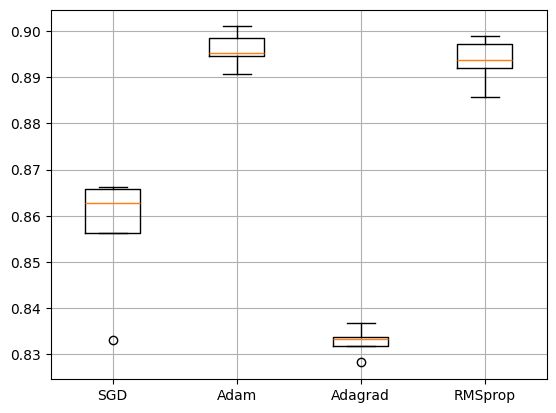

In [136]:
# ÌïòÏù¥Ìçº Îß§Í∞úÎ≥ÄÏàò ÏÑ§Ï†ï
batch_siz=256 # Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶àÎäî Ìïú Î≤àÏóê ÌïôÏäµÌï† Îïå ÏÇ¨Ïö©ÌïòÎäî Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàòÎ•º ÏùòÎØ∏ÌïúÎã§. 
n_epoch=20
k=5 # 5-Í≤π

# Î™®Îç∏ÏùÑ ÏÑ§Í≥ÑÌï¥Ï£ºÎäî Ìï®Ïàò(Î™®Îç∏ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Í∞ùÏ≤¥ modelÏùÑ Î∞òÌôò)
def build_model():
    model=Sequential()
    # 4Í∞úÏùò ÏùÄÎãâÏ∏µÏùÑ Í∞ÄÏßÑ Îã§Ï∏µ ÌçºÏÖâÌä∏Î°† Î™®Îç∏ÏùÑ ÏÑ§Í≥Ñ
    # Í∞Å ÏùÄÎãâÏ∏µÏùÄ ReLU ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÍ≥†, Ï∂úÎ†•Ï∏µÏùÄ ÏÜåÌîÑÌä∏Îß•Ïä§ ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïúÎã§.
    model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2,activation='relu'))
    model.add(Dense(units=n_hidden3,activation='relu'))
    model.add(Dense(units=n_hidden4,activation='relu'))
    model.add(Dense(units=n_output,activation='softmax'))
    return model

# ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ Ìï¥Ï£ºÎäî Ìï®Ïàò(ÏÑúÎ°ú Îã§Î•∏ ÏòµÌã∞ÎßàÏù¥Ï†Ä(opt)Ïóê ÎåÄÌï¥)
def cross_validation(opt_class):  # Ïù∏Ïä§ÌÑ¥Ïä§ ÎåÄÏã† "ÌÅ¥ÎûòÏä§"Î•º Î∞õÏùå
    accuracy=[]
    for train_index, val_index in KFold(k).split(x_train):
        xtrain, xval = x_train[train_index], x_train[val_index]
        ytrain, yval = y_train[train_index], y_train[val_index]

        dmlp = build_model()
        opt = opt_class()  # üí° Ïó¨Í∏∞ÏÑú ÏÉàÎ°úÏö¥ ÏòµÌã∞ÎßàÏù¥Ï†Ä Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
        dmlp.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        dmlp.fit(xtrain, ytrain, batch_size=batch_siz, epochs=n_epoch, verbose=0)
        accuracy.append(dmlp.evaluate(xval, yval, verbose=0)[1])
    return accuracy


# ÏòµÌã∞ÎßàÏù¥Ï†Ä 4Í∞úÏóê ÎåÄÌï¥ ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ Ïã§Ìñâ
acc_sgd = cross_validation(SGD)
acc_adam = cross_validation(Adam)
acc_adagrad = cross_validation(Adagrad)
acc_rmsprop = cross_validation(RMSprop)

# ÏòµÌã∞ÎßàÏù¥Ï†Ä 4Í∞úÏùò Ï†ïÌôïÎ•†ÏùÑ ÎπÑÍµê
print("SGD:",np.array(acc_sgd).mean())
print("Adam:",np.array(acc_adam).mean())
print("Adagrad:",np.array(acc_adagrad).mean())
print("RMSprop:",np.array(acc_rmsprop).mean())

# ÎÑ§ ÏòµÌã∞ÎßàÏù¥Ï†ÄÏùò Ï†ïÌôïÎ•†ÏùÑ Î∞ïÏä§ÌîåÎ°ØÏúºÎ°ú ÎπÑÍµê
plt.boxplot([acc_sgd,acc_adam,acc_adagrad,acc_rmsprop],labels=["SGD","Adam","Adagrad","RMSprop"])
plt.grid()

### CNN

Ïª®Î≥ºÎ£®ÏÖò Ïó∞ÏÇ∞   
- ÌäπÏßï Ï∂îÏ∂ú ÎòêÎäî Ïã†Ìò∏ Î≥ÄÌôòÏóê ÏÇ¨Ïö©   
- ÏàòÏö©Ïû•Í≥º Ïª§ÎÑêÏùò ÏÑ†Ìòï Í≤∞Ìï©   

Ïª®Î≥ºÎ£®ÏÖò ÌäπÏßï   
- Ïª§ÎÑêÏóê Îî∞Îùº ÌäπÏßï Îßµ Ï∂îÏ∂úÌïúÎã§    
- ÏõêÎ≥∏ ÏòÅÏÉÅÍ≥º Í∞ôÏùÄ ÌÅ¨Í∏∞Ïùò ÌäπÏßï Îßµ ÏÉùÏÑ±    

Îã§Ï§ë Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©    
- ÌïòÎÇòÏùò Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©ÌïúÎã§Î©¥, Ïª§ÎÑêÏù¥ Ìïú Ï¢ÖÎ•òÏùò ÌäπÏßïÎßå Ï∂îÏ∂úÌïòÎØÄÎ°ú Îß§Ïö∞ ÎπàÏïΩÌïú ÌäπÏÑ±Ïù¥ ÏÉùÏÑ±ÎêúÎã§.   
- Îî∞ÎùºÏÑú Ïó¨Îü¨ Í∞úÏùò Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©Ìï¥ ÌäπÏßïÏùÑ ÌíçÎ∂ÄÌïòÍ≤å Ï∂îÏ∂úÌïúÎã§.    

In [ ]:
Image('D:/ÍπÄÎèôÏòÅ/Mygit/Mygit/Mygit/Ïù∏Í≥µÏßÄÎä•ÏàòÏóÖ/Ïù¥ÎØ∏ÏßÄ/Ïä§ÌÅ¨Î¶∞ÏÉ∑ 2025-06-14 191053.png')

ÌÖêÏÑúÌîåÎ°úÎ•º ÌôúÏö©Ìï¥ÏÑú CNN Íµ¨ÌòÑ

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# MNIST Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏùΩÍ≥† Ïã†Í≤ΩÎßùÏóê ÏûÖÎ†•Ìï† ÌòïÌÉúÎ°ú Î≥ÄÌôò
(x_train,y_train),(x_test,y_test)= mnist.load_data() # MNIST Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏùΩÏñ¥Ïò¥
x_train=x_train.reshape(60000,28,28,1) # Ï¥ù 60000Í∞úÏùò Ïù¥ÎØ∏ÏßÄ, 28x28ÌîΩÏÖÄ, 1Ï±ÑÎÑê(ÌùëÎ∞±)
x_test=x_test.reshape(10000,28,28,1)   # Ï¥ù 10000Í∞úÏùò Ïù¥ÎØ∏ÏßÄ, 28x28ÌîΩÏÖÄ, 1Ï±ÑÎÑê(ÌùëÎ∞±)
x_train=x_train.astype(np.float32)/255.0 # float32ÌòïÏúºÎ°ú Î≥ÄÌôò ÌõÑ ÌîΩÏÖÄÍ∞íÏùÑ 0~1ÏÇ¨Ïù¥Î°ú Ï†ïÍ∑úÌôî
x_test=x_test.astype(np.float32)/255.0  # float32ÌòïÏúºÎ°ú Î≥ÄÌôò ÌõÑ ÌîΩÏÖÄÍ∞íÏùÑ 0~1ÏÇ¨Ïù¥Î°ú Ï†ïÍ∑úÌôî
y_train=tf.keras.utils.to_categorical(y_train,10) # 0~9ÍπåÏßÄÏùò Ïà´ÏûêÏù¥ÎØÄÎ°ú 10Í∞úÏùò ÌÅ¥ÎûòÏä§
y_test=tf.keras.utils.to_categorical(y_test,10) # 0~9ÍπåÏßÄÏùò Ïà´ÏûêÏù¥ÎØÄÎ°ú 10Í∞úÏùò ÌÅ¥ÎûòÏä§

In [ ]:
# LeNet-5 Ïã†Í≤ΩÎßù Î™®Îç∏ ÏÑ§Í≥Ñ
cnn=Sequential()
# 3Í∞úÏùò Ìï©ÏÑ±Í≥±Ï∏µ(Conv2D)Í≥º 2Í∞úÏùò ÌíÄÎßÅÏ∏µ(Maxpooling2D)ÏúºÎ°ú Íµ¨ÏÑ±Îêú LeNet-5 Ïã†Í≤ΩÎßù Î™®Îç∏ÏùÑ ÏÑ§Í≥Ñ
# Ïà´Ïûê ÏùòÎØ∏ : (ÌïÑÌÑ∞ Í∞úÏàò, (ÌïÑÌÑ∞ ÌÅ¨Í∏∞)), padding='same' : ÏûÖÎ†•Í≥º Ï∂úÎ†•Ïùò ÌÅ¨Í∏∞Î•º Í∞ôÍ≤å Ïú†ÏßÄ
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
# MaxPoolingÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ 2x2 ÌÅ¨Í∏∞Ïùò ÌïÑÌÑ∞Î°ú 2Î∞∞Î°ú Îã§Ïö¥ÏÉòÌîåÎßÅ
cnn.add(MaxPooling2D(pool_size=(2,2))) # ÌíÄÎßÅÏ∏µÏùÄ 2x2 ÌÅ¨Í∏∞Ïùò ÌïÑÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ 2Î∞∞Î°ú Îã§Ïö¥ÏÉòÌîåÎßÅ
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
# MUlti Layer Perceptron(MLP) : Fully Connected Layer
cnn.add(Flatten()) # 3Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞Î•º 1Ï∞®ÏõêÏúºÎ°ú Î≥ÄÌôò
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

# Ïã†Í≤ΩÎßù Î™®Îç∏ ÌïôÏäµ
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# Ïã†Í≤ΩÎßù Î™®Îç∏ Ï†ïÌôïÎ•† ÌèâÍ∞Ä
res=cnn.evaluate(x_test,y_test,verbose=0)
print("Ï†ïÌôïÎ•†ÏùÄ",res[1]*100)

import matplotlib.pyplot as plt

# Ï†ïÌôïÎ•† Í∑∏ÎûòÌîÑ
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# ÏÜêÏã§ Ìï®Ïàò Í∑∏ÎûòÌîÑ
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

Í∑úÏ†ú Í∏∞Î≤ïÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ CNN Íµ¨ÌòÑ

In [ ]:
# CIFAR-10 Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏùΩÍ≥† Ïã†Í≤ΩÎßùÏóê ÏûÖÎ†•Ìï† ÌòïÌÉúÎ°ú Î≥ÄÌôò
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # CIFAR-10 Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏùΩÏñ¥Ïò¥
# train : 50000Í∞ú, test: 10000Í∞ú
x_train=x_train.astype(np.float32)/255.0 # float32ÌòïÏúºÎ°ú Î≥ÄÌôò ÌõÑ ÌîΩÏÖÄÍ∞íÏùÑ 0~1ÏÇ¨Ïù¥Î°ú Ï†ïÍ∑úÌôî
x_test=x_test.astype(np.float32)/255.0  # float32ÌòïÏúºÎ°ú Î≥ÄÌôò ÌõÑ ÌîΩÏÖÄÍ∞íÏùÑ 0~1ÏÇ¨Ïù¥Î°ú Ï†ïÍ∑úÌôî
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

170498071/170498071 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 213s 1us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# Ïã†Í≤ΩÎßù Î™®Îç∏ ÏÑ§Í≥Ñ
# 4Í∞úÏùò Ìï©ÏÑ±Í≥±Ï∏µ(Conv2D)Í≥º 3Í∞úÏùò ÌíÄÎßÅÏ∏µ(Maxpooling2D)ÏúºÎ°ú Íµ¨ÏÑ±Îêú Ïã†Í≤ΩÎßù Î™®Îç∏ÏùÑ ÏÑ§Í≥Ñ
# Í∑úÏ†úÌôî Í∏∞Î≤ïÏúºÎ°ú ÎìúÎ°≠ÏïÑÏõÉ(Dropout)Í≥º Îç∞Ïù¥ÌÑ∞ Ï¶ùÎåÄ Í∏∞Î≤ïÏùÑ ÏÇ¨Ïö©
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# Ïã†Í≤ΩÎßù Î™®Îç∏ ÌïôÏäµ(ÏòÅÏÉÅ Ï¶ùÎåÄÍ∏∞ ÌôúÏö©)
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
batch_siz=128
# Îç∞Ïù¥ÌÑ∞ Ï¶ùÎåÄÍ∏∞(ImageDataGenerator)Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Î≥ÄÌòïÏùÑ ÏÉùÏÑ±
# width_shift_range : ÏàòÌèâ Ïù¥Îèô Î≤îÏúÑ, height_shift_range : ÏàòÏßÅ Ïù¥Îèô Î≤îÏúÑ
# horizontal_flip : ÏàòÌèâ Î∞òÏ†Ñ Ïó¨Î∂Ä
generator=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
hist=cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=50,validation_data=(x_test,y_test),verbose=2)

# Ïã†Í≤ΩÎßù Î™®Îç∏ Ï†ïÌôïÎ•† ÌèâÍ∞Ä
res=cnn.evaluate(x_test,y_test,verbose=0)
print("Ï†ïÌôïÎ•†ÏùÄ",res[1]*100)

import matplotlib.pyplot as plt

# Ï†ïÌôïÎ•† Í∑∏ÎûòÌîÑ
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# ÏÜêÏã§ Ìï®Ïàò Í∑∏ÎûòÌîÑ
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

dropout ÎπÑÏú®ÏùÑ Îã¨Î¶¨ Ï†ÅÏö©

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold

# CIFAR-10 Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏùΩÍ≥† Ïã†Í≤ΩÎßùÏóê ÏûÖÎ†•Ìï† ÌòïÌÉúÎ°ú Î≥ÄÌôò
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# ÌïòÏù¥Ìçº Îß§Í∞úÎ≥ÄÏàò ÏÑ§Ï†ï
batch_siz=128 # Î∞∞Ïπò ÌÅ¨Í∏∞
n_epoch=10 # ÏóêÌè¨ÌÅ¨ Ïàò
k=5 # k-Í≤π ÍµêÏ∞® Í≤ÄÏ¶ù

# ÎìúÎ°≠ÏïÑÏõÉ ÎπÑÏú®Ïóê Îî∞Îùº ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÏàòÌñâÌïòÍ≥† Ï†ïÌôïÎ•†ÏùÑ Î∞òÌôòÌïòÎäî Ìï®Ïàò
def cross_validation(dropout_rate):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train): # KFoldÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌõàÎ†® ÏßëÌï©Í≥º Í≤ÄÏ¶ù ÏßëÌï©ÏúºÎ°ú Î∂ÑÌï†
        # ÌõàÎ†® ÏßëÌï©Í≥º Í≤ÄÏ¶ù ÏßëÌï©ÏúºÎ°ú Î∂ÑÌï†
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]

        # Ïã†Í≤ΩÎßù Î™®Îç∏ ÏÑ§Í≥Ñ
        cnn=Sequential()
        cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
        cnn.add(Conv2D(32,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[0]))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[1]))
        cnn.add(Flatten())
        cnn.add(Dense(512,activation='relu'))
        cnn.add(Dropout(dropout_rate[2]))
        cnn.add(Dense(10,activation='softmax'))

        # Ïã†Í≤ΩÎßù Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÍ≥† ÌèâÍ∞ÄÌïòÍ∏∞
        # loss : ÌÅ¨Î°úÏä§ ÏóîÌä∏Î°úÌîº ÏÜêÏã§ Ìï®Ïàò, optimizer : Adam optimizer ÏÇ¨Ïö©
        cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
        cnn.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=0)
        accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
    return accuracy

# ÎìúÎ°≠ÏïÑÏõÉ ÎπÑÏú®ÏùÑ Îã¨Î¶¨ÌïòÎ©∞ Ïã†Í≤ΩÎßùÏùÑ ÌèâÍ∞Ä
acc_without_dropout=cross_validation([0.0,0.0,0.0])
acc_with_dropout=cross_validation([0.25,0.25,0.5]) # ÎìúÎ°≠ÏïÑÏõÉ ÎπÑÏú®ÏùÑ 0.25, 0.25, 0.5Î°ú ÏÑ§Ï†ï

print("ÎìúÎ°≠ÏïÑÏõÉ Ï†ÅÏö© Ïïà Ìï† Îïå:",np.array(acc_without_dropout).mean()) # ÎìúÎ°≠ÏïÑÏõÉ Ï†ÅÏö© Ïïà Ìï† Îïå ÌèâÍ∑† Ï†ïÌôïÎ•†
print("ÎìúÎ°≠ÏïÑÏõÉ Ï†ÅÏö©Ìï† Îïå:",np.array(acc_with_dropout).mean()) # ÎìúÎ°≠ÏïÑÏõÉ Ï†ÅÏö©Ìï† Îïå ÌèâÍ∑† Ï†ïÌôïÎ•†

import matplotlib.pyplot as plt

# Î∞ïÏä§ ÌîåÎ°ØÏúºÎ°ú Ï†ïÌôïÎ•† ÌëúÏãú
plt.grid()
plt.boxplot([acc_without_dropout,acc_with_dropout],labels=["Without Dropout","With Dropout"])

Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶àÏôÄ ÏóêÌè≠ Ïàò Ï°∞Ï†ï

In [ ]:
# Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶àÏôÄ ÏóêÌè≠ ÏàòÏóê Îî∞Îùº ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÏàòÌñâÌïòÍ≥† Ï†ïÌôïÎ•†ÏùÑ Î∞òÌôòÌïòÎäî Ìï®Ïàò
def cross_validation_with_batch_and_epoch(batch_size, epochs):
  accuracy = []
  for train_index, val_index in KFold(k).split(x_train):  # KFoldÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌõàÎ†® ÏßëÌï©Í≥º Í≤ÄÏ¶ù ÏßëÌï©ÏúºÎ°ú Î∂ÑÌï†
    # ÌõàÎ†® ÏßëÌï©Í≥º Í≤ÄÏ¶ù ÏßëÌï©ÏúºÎ°ú Î∂ÑÌï†
    xtrain, xval = x_train[train_index], x_train[val_index]
    ytrain, yval = y_train[train_index], y_train[val_index]

    # Ïã†Í≤ΩÎßù Î™®Îç∏ ÏÑ§Í≥Ñ
    cnn = Sequential()
    cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    cnn.add(Conv2D(32, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.25))
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.25))
    cnn.add(Flatten())
    cnn.add(Dense(512, activation='relu'))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(10, activation='softmax'))

    # Ïã†Í≤ΩÎßù Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÍ≥† ÌèâÍ∞ÄÌïòÍ∏∞
    cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    cnn.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, verbose=0)
    accuracy.append(cnn.evaluate(xval, yval, verbose=0)[1])
  return accuracy


In [ ]:
# Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶àÏôÄ ÏóêÌè≠ ÏàòÎ•º Ï†ÄÏû•ÌïòÎäî Î¶¨Ïä§Ìä∏
batch_sizes = [64, 128, 256]
epochs_list = [10, 20, 5]

  # Í∞Å Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶àÏôÄ ÏóêÌè≠ ÏàòÏóê ÎåÄÌï¥ Ïã†Í≤ΩÎßùÏùÑ ÌèâÍ∞Ä
accuracies = []
for batch_size, epochs in zip(batch_sizes, epochs_list):
  acc = cross_validation_with_batch_and_epoch(batch_size=batch_size, epochs=epochs)
  accuracies.append((batch_size, epochs, np.array(acc).mean()))

  # Í≤∞Í≥º Ï∂úÎ†•
for batch_size, epochs, mean_acc in accuracies:
  print(f"Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶à: {batch_size}, ÏóêÌè≠ Ïàò: {epochs}, ÌèâÍ∑† Ï†ïÌôïÎ•†: {mean_acc}")

  # Î∞ïÏä§ ÌîåÎ°ØÏúºÎ°ú Ï†ïÌôïÎ•† ÌëúÏãú
plt.grid()
plt.boxplot([cross_validation_with_batch_and_epoch(batch_size=batch, epochs=epoch) for batch, epoch in zip(batch_sizes, epochs_list)],
      labels=[f"Batch {batch}, Epoch {epoch}" for batch, epoch in zip(batch_sizes, epochs_list)])
plt.title("Batch Size and Epoch Comparison")
plt.ylabel("Accuracy")
plt.show()